In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from tqdm import tqdm
import os

In [2]:
# load trained model from joblib
rf_model = joblib.load('bin/rf_model__v2.joblib')

#### Test predictions for 03 dec

In [3]:
from sklearn.metrics import classification_report

# load the test data
test_folder = 'test0312/attr/'
class_names = ['Mid Probability', 'Low Probability', 'High Probability']

X = pd.read_csv('test0312/attr/test_X.csv')
y = pd.read_csv('test0312/attr/test_y.csv')

pred = rf_model.predict(X)
probs = rf_model.predict_proba(X)

accuracy = accuracy_score(y, pred)
print(f"Test Accuracy on 03 dec: {accuracy}")

print("Test Classification Report")
print(classification_report(y, pred, target_names=class_names))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.7s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   12.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.7s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   11.4s finished


Test Accuracy on 03 dec: 0.9931707294611467
Test Classification Report
                  precision    recall  f1-score   support

 Mid Probability       1.00      0.99      0.99  10925684
 Low Probability       0.99      1.00      0.99  11527848
High Probability       1.00      0.98      0.99   1869710

        accuracy                           0.99  24323242
       macro avg       0.99      0.99      0.99  24323242
    weighted avg       0.99      0.99      0.99  24323242



Test counter :: {'Mid Probability': 10833273, 'Low Probability': 11636283, 'High Probability': 1853686}


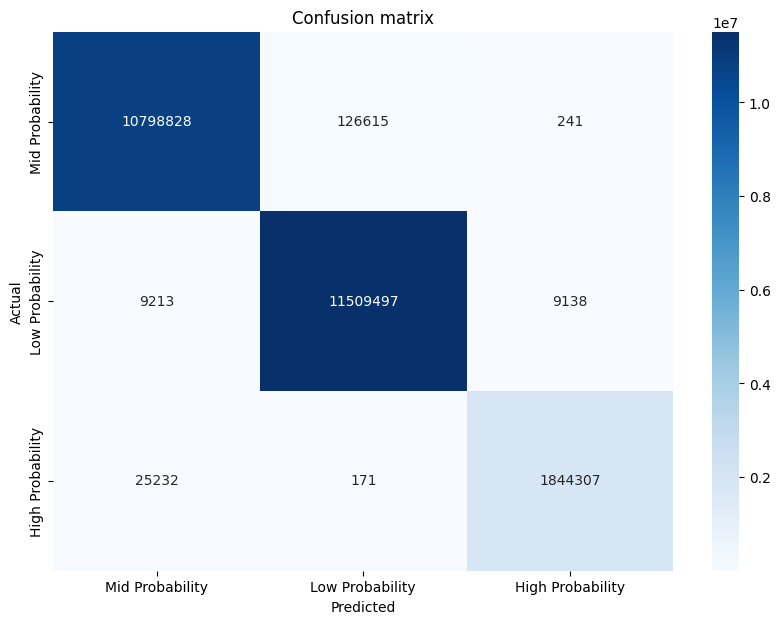

In [4]:
# plot a confusion matrix for model_data and target classes
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from collections import Counter

class_names = ['Mid Probability', 'Low Probability', 'High Probability']

print("Test counter ::", {class_names[i]: Counter(pred)[i] for i in range(3)})

# Confusion matrix for validation and test data
cm = confusion_matrix(y, pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()